## Linear Regression using Gradient Descent

- Best fit line represented by y = m1 * x1 + m2 * x2 + m3 * x3 + ... + c
- Fit of line calculated by mean squared error
- parameters computed using gradient descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [2]:
x,y=make_regression(n_features=1,n_samples=200,bias=20,noise=40)
x=pd.DataFrame(x)
y=pd.DataFrame(y)

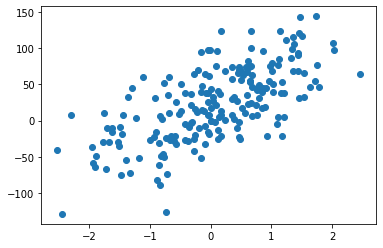

In [3]:
plt.scatter(x,y)

In [4]:
class linear_regression:
    def __init__(self,features=1,epochs=1000,learning_rate=0.001,regularization="None",lambda_=1):
        self.features=features
        ## Initializing weights and biases to 0
        self.weights=np.zeros(features)
        self.bias=0
        self.epochs=epochs
        self.regularization=regularization
        self.lambda_=lambda_
        self.learning_rate=learning_rate
    def fit(self,data,y,print_every_nth_epoch=1):
        assert self.features==data.shape[1],"Number of features don't match"
        assert y.shape[0]==data.shape[0],"Number of entries don't match"
        for epoch in range(self.epochs):
            ## Computing model predictions as y_bar
            df=data.copy()
            n=data.shape[0]
            df=df*self.weights
            df['y_bar']=df.sum(axis=1)+self.bias
            df['diff']=y[y.columns[0]]-df['y_bar']
            ##calculation gradient wrt each weight and bias and making changes
            for feature in range(self.features):
                self.weights[feature]=self.weights[feature]+self.learning_rate*(df['diff']*data[data.columns[feature]]).sum()/n
                if(self.regularization=="L1"):
                    if(self.weights[feature]>0):
                        self.weights[feature]-=self.lambda_
                    else:
                        self.weights[feature]+=self.lambda_
                if(self.regularization=="L2"):
                    self.weights[feature]=self.weights[feature]-2*self.lambda_*self.weights[feature]
            self.bias=self.bias+((df['diff']).sum()/n)*self.learning_rate
            if((epoch+1)%print_every_nth_epoch==0):
                error=(df['diff']**2).sum()/(2*n)
                if(self.regularization=="L1"):
                    error+=self.lambda_*(sum(np.abs(self.weights)))
                if(self.regularization=="L2"):
                    error+=self.lambda_*(sum(self.weights**2)) 
                print("-------- epoch {} --> Mean Sq. Error: {} ----------".format(epoch+1,error))
                print()
    def predict(self,data):
        assert self.features==data.shape[1],"Number of features don't match"
        df=data.copy()
        df=df*self.weights
        df['y_bar']=df.sum(axis=1)+self.bias
        return df['y_bar']

In [5]:
model=linear_regression(epochs=500,learning_rate=0.01)
model.fit(x,y,print_every_nth_epoch=100)

-------- epoch 100 --> Mean Sq. Error: 819.4933915666 ----------

-------- epoch 200 --> Mean Sq. Error: 724.9531187167311 ----------

-------- epoch 300 --> Mean Sq. Error: 713.0965929646915 ----------

-------- epoch 400 --> Mean Sq. Error: 711.5941009475483 ----------

-------- epoch 500 --> Mean Sq. Error: 711.4013357786858 ----------



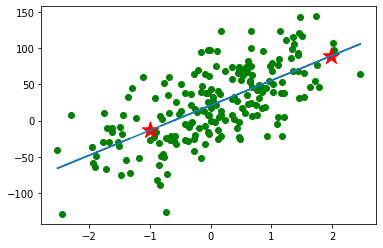

In [6]:
test_x=pd.DataFrame([-1,1.99])
test_y=model.predict(test_x)
plt.scatter(x,y,c='g')
plt.plot(x.to_numpy(),(x*model.weights[0]+model.bias).to_numpy())
plt.scatter(test_x,test_y,c='r',marker='*',s=300)
plt.show()

### Testing multiple regression using polynomial data

      0
0 -1000
1  -970
2  -940
3  -910
4  -880
           0
0 -998999900
1 -911732000
2 -829700300
3 -752742800
4 -680697500


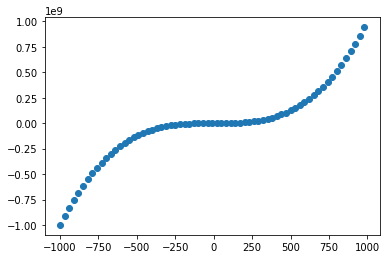

In [7]:
x=pd.DataFrame(np.arange(-1000,1000,30))
y=x**3+x**2+100
print(x.head())
print(y.head())
plt.scatter(x,y)

In [8]:
x[1]=x[0]**2
x[2]=x[0]**3
x.head()

,0,1,2
0,-1000,1000000,-1000000000
1,-970,940900,-912673000
2,-940,883600,-830584000
3,-910,828100,-753571000
4,-880,774400,-681472000


In [9]:
model=linear_regression(features=3,epochs=1000,learning_rate=0.00000000000000001)
model.fit(x,y,print_every_nth_epoch=100)

-------- epoch 100 --> Mean Sq. Error: 101693991313.89662 ----------

-------- epoch 200 --> Mean Sq. Error: 101652635750.34799 ----------

-------- epoch 300 --> Mean Sq. Error: 101611297004.72563 ----------

-------- epoch 400 --> Mean Sq. Error: 101569975070.20053 ----------

-------- epoch 500 --> Mean Sq. Error: 101528669939.92845 ----------

-------- epoch 600 --> Mean Sq. Error: 101487381607.08147 ----------

-------- epoch 700 --> Mean Sq. Error: 101446110064.82297 ----------

-------- epoch 800 --> Mean Sq. Error: 101404855306.3355 ----------

-------- epoch 900 --> Mean Sq. Error: 101363617324.77798 ----------

-------- epoch 1000 --> Mean Sq. Error: 101322396113.34059 ----------



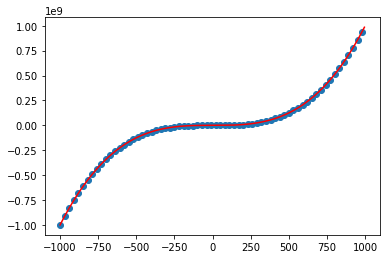

In [10]:
plt.scatter(x[0],y)
test_x=pd.DataFrame(np.arange(-1000,1000,5))
test_x[1]=test_x[0]**2
test_x[2]=test_x[0]**3
plt.plot(test_x[0],model.predict(test_x),c='r')

### Rigde Regression

In [11]:
x,y=make_regression(n_features=1,n_samples=200,bias=20,noise=40)
x=pd.DataFrame(x)
y=pd.DataFrame(y)
model1=linear_regression(regularization="L2",lambda_=0.001)
model1.fit(x,y,print_every_nth_epoch=100)

-------- epoch 100 --> Mean Sq. Error: 5198.058780339412 ----------

-------- epoch 200 --> Mean Sq. Error: 4583.443535337626 ----------

-------- epoch 300 --> Mean Sq. Error: 4159.539959629788 ----------

-------- epoch 400 --> Mean Sq. Error: 3862.403300787343 ----------

-------- epoch 500 --> Mean Sq. Error: 3651.3090309683867 ----------

-------- epoch 600 --> Mean Sq. Error: 3499.690612293136 ----------

-------- epoch 700 --> Mean Sq. Error: 3389.822553843751 ----------

-------- epoch 800 --> Mean Sq. Error: 3309.6362850962596 ----------

-------- epoch 900 --> Mean Sq. Error: 3250.7695567711876 ----------

-------- epoch 1000 --> Mean Sq. Error: 3207.3424772000344 ----------



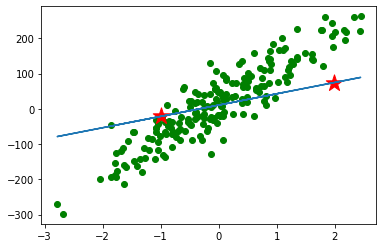

In [12]:
test_x=pd.DataFrame([-1,1.99])
test_y=model1.predict(test_x)
plt.scatter(x.to_numpy(),y.to_numpy(),c='g')
plt.plot(x.to_numpy(),(x*model1.weights[0]+model1.bias).to_numpy())
plt.scatter(test_x,test_y,c='r',marker='*',s=300)
plt.show()

### Lasso Regression

In [13]:
x,y=make_regression(n_features=1,n_samples=200,bias=20,noise=40)
x=pd.DataFrame(x)
y=pd.DataFrame(y)
x[2]=11
model2=linear_regression(regularization="L1",lambda_=0.001,features=2)
model2.fit(x,y,print_every_nth_epoch=100)

-------- epoch 100 --> Mean Sq. Error: 2924.4990481215546 ----------

-------- epoch 200 --> Mean Sq. Error: 2537.224065888131 ----------

-------- epoch 300 --> Mean Sq. Error: 2222.0054534290343 ----------

-------- epoch 400 --> Mean Sq. Error: 1965.3885857753994 ----------

-------- epoch 500 --> Mean Sq. Error: 1756.4358880216935 ----------

-------- epoch 600 --> Mean Sq. Error: 1586.2554792635108 ----------

-------- epoch 700 --> Mean Sq. Error: 1447.61813542536 ----------

-------- epoch 800 --> Mean Sq. Error: 1334.64601410513 ----------

-------- epoch 900 --> Mean Sq. Error: 1242.559692687554 ----------

-------- epoch 1000 --> Mean Sq. Error: 1167.4725917846508 ----------



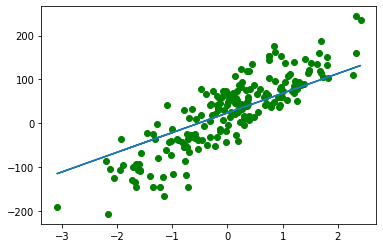

In [14]:
plt.scatter(x[0].to_numpy(),y.to_numpy(),c='g')
plt.plot(x[0].to_numpy(),(x[0]*model2.weights[0]+x[2]*model2.weights[1]+model2.bias).to_numpy())
plt.show()